In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [97]:
train=pd.read_table("features.train.txt",delim_whitespace=True,header=None)
train_x=train.iloc[:,1:3]
train_y=train.iloc[:,0]
train_y=(train_y==0)*2-1
test=pd.read_table("features.test.txt",delim_whitespace=True,header=None)
test_x=test.iloc[:,1:3]
test_y=test.iloc[:,0]
test_y=(test_y==0)*2-1
#train_x[train_y==1]

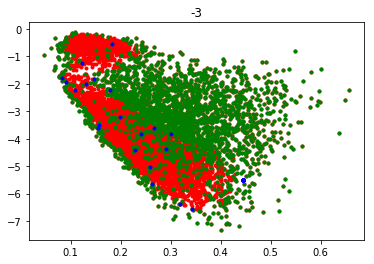

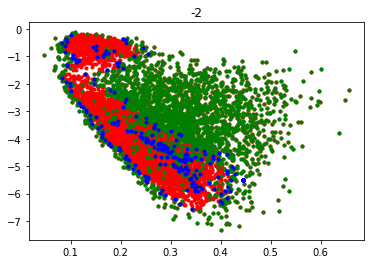

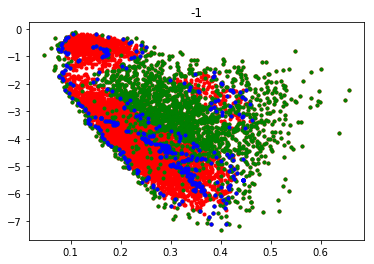

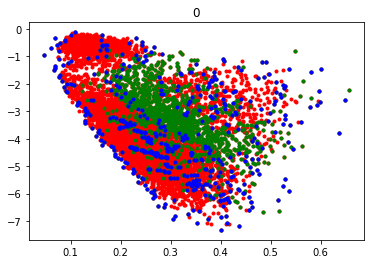

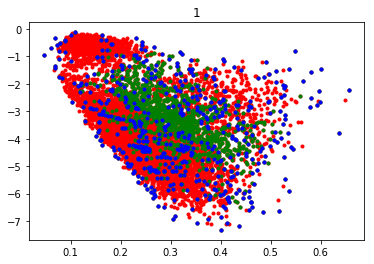

In [98]:
#这几个图说明，C越大，对错误的容限越小，C变大，整个的就往过拟合的方向走了
#结果就是free的支撑向量变多，bounded SV这种不一定对错的变少（对错误的容限小了，犯错误的点少了）
#然后这个胖胖的边界就要越瘦，也就是在往过拟合的方向走
C=[-3,-2,-1,0,1]
gamma=100
for c in C:
    clf=svm.SVC(C=pow(10,c),kernel='rbf',gamma=gamma)
    clf.fit(train_x,train_y)
    SV=clf.support_vectors_   
    b=clf.intercept_
    alphay=clf.dual_coef_
    free_SV_index=np.where(abs(alphay)!=pow(10,c))  #得到两个array，一个行一个列。行都是0，就不用管了，列是free的支撑向量的index
    #下面这一堆开始想错了，这个东西要除以w的模才是点到超平面的距离，然而RBF是无限维求不了w的模......
    #但是这个验证了，free的支撑向量不除以w的模的时候，也就是y(wz+b)>=1。
    #最后那个数(np.dot(alphay,Ker)+b)基本都是0.99几（这个算的没有乘y，看绝对值也行）
    #换一种思路，算这个数费劲，可以画图啊，直接暴力画图
    #     print (alphay[free_SV_index])
#     choose_free_sv=SV[free_SV_index[1][0]]   #从free的支撑向量中挑一个点出来，算这个点到超平面的距离
#     print (SV)
#     print (choose_free_sv)
#     Ker=np.exp(-gamma*np.linalg.norm(SV-choose_free_sv,axis=1))
#     print (np.dot(alphay,Ker)+b)
    plt.title(c)
    plt.plot(train_x.iloc[:,0],train_x.iloc[:,1],'r.')   #数据点，红色
    plt.plot(SV[:,0],SV[:,1],'g.')                       #所有的支撑向量，绿色
    plt.plot(SV[free_SV_index,0],SV[free_SV_index,1],'b.')   #free的支撑向量，蓝色
    plt.show()
    
    #free_SV=[i for i in alphay[0] if (i!=0.001 and i!=-0.001)]

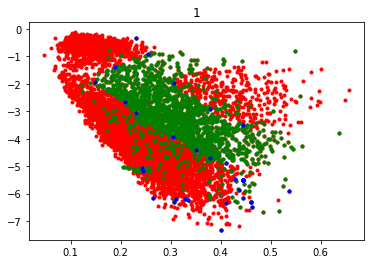

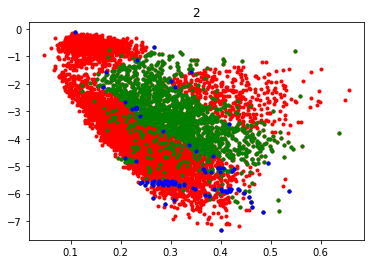

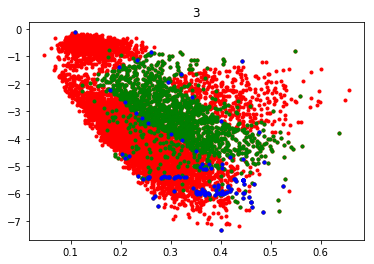

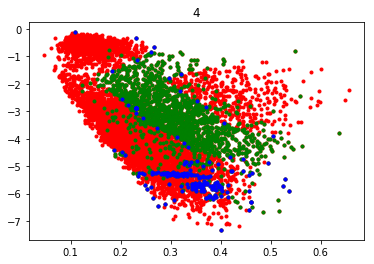

In [99]:
#19题
#这个高斯函数，那个gamma是表征钟型的宽度的，gamma越大，这个钟越尖
#（就是高斯函数放在分母位置的是方差，这个数越大钟越胖，现在gamma是这个方差的倒数）
#gamma越大，这个核函数越sharp，就越容易过拟合
c=0.1
Gamma=[1,2,3,4]
for gam in Gamma:
    clf=svm.SVC(C=pow(10,c),kernel='rbf',gamma=gam)
    clf.fit(train_x,train_y)
    SV=clf.support_vectors_   
    b=clf.intercept_
    alphay=clf.dual_coef_
    free_SV_index=np.where(abs(alphay)!=pow(10,c))  #得到两个array，一个行一个列。行都是0，就不用管了，列是free的支撑向量的index
    #下面这一堆开始想错了，这个东西要除以w的模才是点到超平面的距离，然而RBF是无限维求不了w的模......
    #但是这个验证了，free的支撑向量不除以w的模的时候，也就是y(wz+b)>=1。
    #最后那个数(np.dot(alphay,Ker)+b)基本都是0.99几（这个算的没有乘y，看绝对值也行）
    #换一种思路，算这个数费劲，可以画图啊，直接暴力画图
    #     print (alphay[free_SV_index])
#     choose_free_sv=SV[free_SV_index[1][0]]   #从free的支撑向量中挑一个点出来，算这个点到超平面的距离
#     print (SV)
#     print (choose_free_sv)
#     Ker=np.exp(-gamma*np.linalg.norm(SV-choose_free_sv,axis=1))
#     print (np.dot(alphay,Ker)+b)
    plt.title(gam)
    plt.plot(train_x.iloc[:,0],train_x.iloc[:,1],'r.')   #数据点，红色
    plt.plot(SV[:,0],SV[:,1],'g.')                       #所有的支撑向量，绿色
    plt.plot(SV[free_SV_index,0],SV[free_SV_index,1],'b.')   #free的支撑向量，蓝色
    plt.show()
    
    #free_SV=[i for i in alphay[0] if (i!=0.001 and i!=-0.001)]